In [1]:
import pandas as pd
import numpy as np

In [1]:
data = pd.read_csv('./data/aus-open-player-stats-2018.csv')
data.head()

NameError: name 'pd' is not defined

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   128 non-null    int64  
 1   name                         128 non-null    object 
 2   year                         128 non-null    int64  
 3   aces                         128 non-null    int64  
 4   double_faults                128 non-null    int64  
 5   1st_serve                    128 non-null    float64
 6   1st_serve_points_won         128 non-null    float64
 7   2nd_serve_points_won         128 non-null    float64
 8   break_points_faced           128 non-null    int64  
 9   break_points_saved           128 non-null    float64
 10  service_games_played         128 non-null    int64  
 11  service_games_won            128 non-null    float64
 12  total_service_points_won     128 non-null    float64
 13  1st_serve_return_poi

<Axes: >

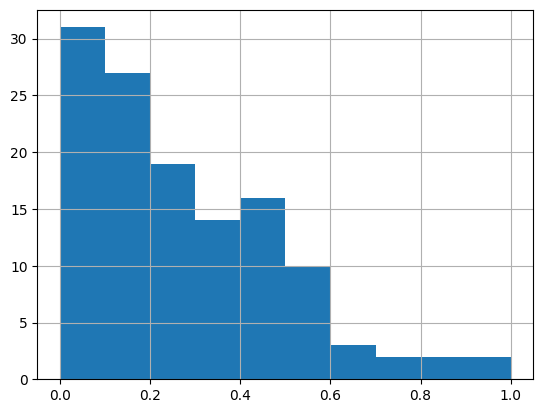

In [4]:
data['aces_per_match'] = data.aces / data.matches_played
data['double_faults_per_match'] = data.double_faults / data.matches_played
apm = data.aces_per_match.dropna()
apm = apm / apm.max()
apm.hist()


In [5]:
data.columns

Index(['Unnamed: 0', 'name', 'year', 'aces', 'double_faults', '1st_serve',
       '1st_serve_points_won', '2nd_serve_points_won', 'break_points_faced',
       'break_points_saved', 'service_games_played', 'service_games_won',
       'total_service_points_won', '1st_serve_return_points_won',
       '2nd_serve_return_points_won', 'break_points_opportunities',
       'break_points_converted', 'return_games_played', 'return_games_won',
       'return_points_won', 'total_points_won', 'rank', 'height (cm)',
       'matches_played', 'aces_per_match', 'double_faults_per_match'],
      dtype='object')

In [6]:
cols = ['aces','double_faults', 'break_points_opportunities', 'break_points_faced']
for col in cols:
    data[f'{col}_per_match'] = data[col] / data.matches_played

In [7]:
data.sort_values('aces_per_match')[data.aces == 0]

/var/folders/5s/n9ngbpyj5wj26gclw3n79mgc0000gn/T/ipykernel_45713/3086958276.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values('aces_per_match')[data.aces == 0]


,Unnamed: 0,name,year,aces,double_faults,1st_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_games_won,return_points_won,total_points_won,rank,height (cm),matches_played,aces_per_match,double_faults_per_match,break_points_opportunities_per_match,break_points_faced_per_match
35,35,Rudolf Molleker,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,207.0,185,18,0.0,0.0,0.0,0.0
53,53,Pedro Sousa,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,103.0,180,2,0.0,0.0,0.0,0.0
80,80,Daniel Evans,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,190.0,175,32,0.0,0.0,0.0,0.0
41,41,Cristian Garin,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,86.0,185,19,0.0,0.0,0.0,0.0
99,99,Marc Polmans,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,170.0,188,33,0.0,0.0,0.0,0.0
15,15,Kamil Majchrzak,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,176.0,180,36,0.0,0.0,0.0,0.0
21,21,Steve Darcis,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,315.0,175,0,NaN,NaN,NaN,NaN
39,39,Janko Tipsarevic,2018,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,-inf,180,0,NaN,NaN,NaN,NaN


<Axes: >

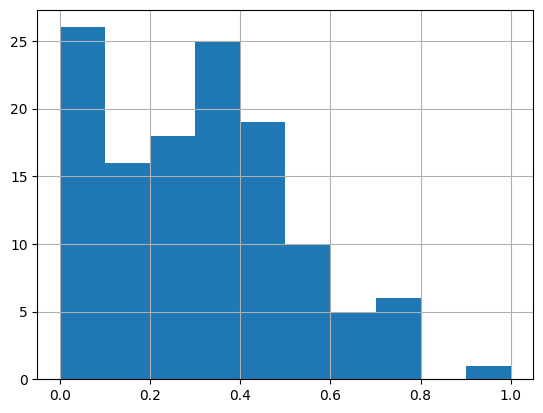

In [8]:
dpm = data.double_faults_per_match.dropna()
dpm = dpm/dpm.max()
dpm.hist()

<Axes: >

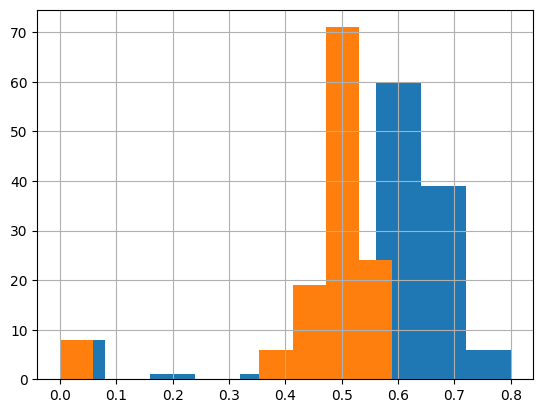

In [9]:
data.break_points_saved.hist()
data['2nd_serve_points_won'].hist()

<Axes: >

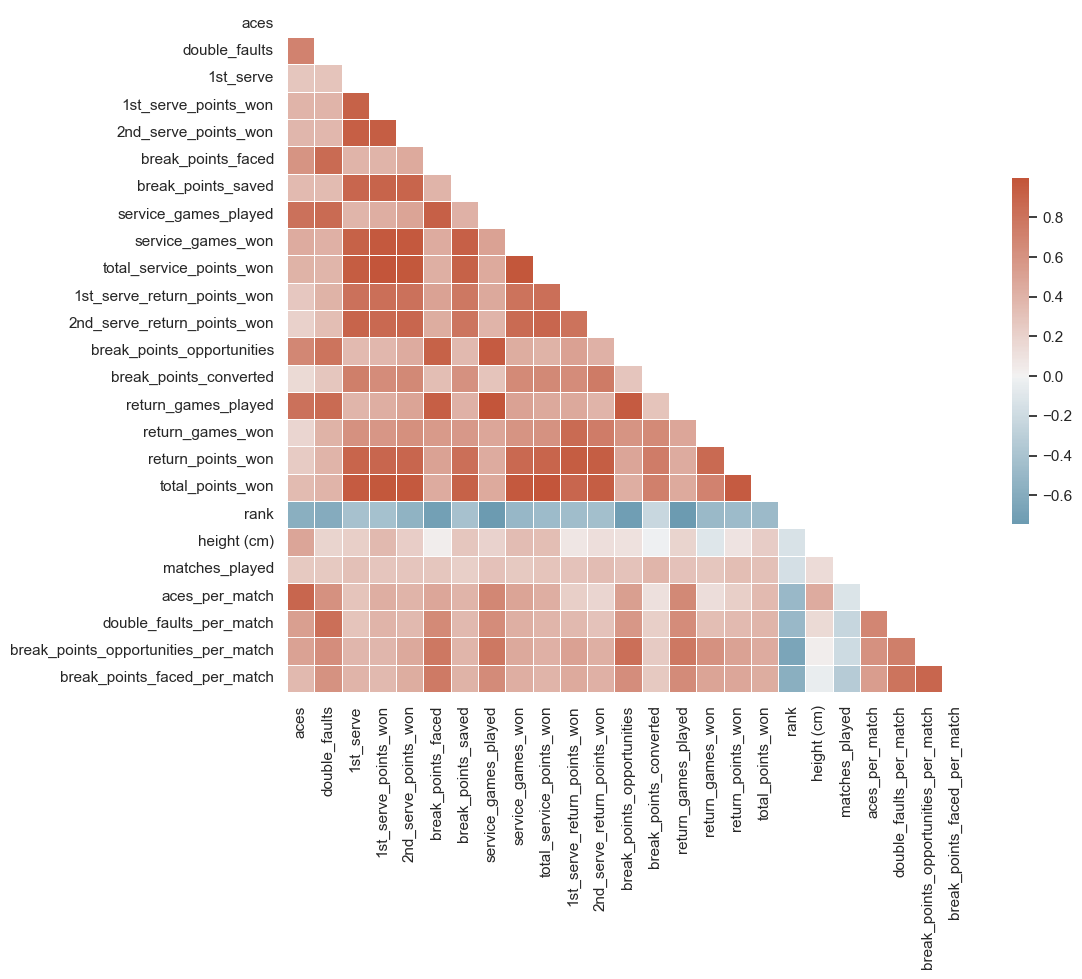

In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = data.iloc[:,3:]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [164]:
corr.to_csv('~/Desktop/corr.csv')

In [165]:
data.columns

Index(['Unnamed: 0', 'name', 'year', 'aces', 'double_faults', '1st_serve',
       '1st_serve_points_won', '2nd_serve_points_won', 'break_points_faced',
       'break_points_saved', 'service_games_played', 'service_games_won',
       'total_service_points_won', '1st_serve_return_points_won',
       '2nd_serve_return_points_won', 'break_points_opportunities',
       'break_points_converted', 'return_games_played', 'return_games_won',
       'return_points_won', 'total_points_won', 'rank', 'height (cm)',
       'matches_played', 'aces_per_match', 'double_faults_per_match',
       'break_points_opportunities_per_match', 'break_points_faced_per_match'],
      dtype='object')

In [166]:
cols = ['1st_serve',
        '1st_serve_points_won', '2nd_serve_points_won',
 'service_games_won',
        '1st_serve_return_points_won',
        '2nd_serve_return_points_won',
        'break_points_converted', 'return_games_won',
        'height (cm)',
        'matches_played', 'aces_per_match', 'double_faults_per_match', 'break_points_opportunities'
        ]


In [167]:
import matplotlib.pyplot as plt
data = data[data.aces != 0]
data

,Unnamed: 0,name,year,aces,double_faults,1st_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_games_won,return_points_won,total_points_won,rank,height (cm),matches_played,aces_per_match,double_faults_per_match,break_points_opportunities_per_match,break_points_faced_per_match
0,0,Novak Djokovic,2018,174,91,0.64,0.74,0.58,157,0.66,...,0.29,0.41,0.54,1.0,188,42,4.142857,2.166667,8.261905,3.738095
1,1,Mitchell Krueger,2018,17,8,0.58,0.69,0.48,27,0.48,...,0.13,0.35,0.46,231.0,188,44,0.386364,0.181818,0.636364,0.613636
2,2,Rafael Nadal,2018,54,32,0.67,0.71,0.55,129,0.68,...,0.30,0.41,0.53,2.0,185,17,3.176471,1.882353,9.588235,7.588235
3,3,James Duckworth,2018,45,25,0.49,0.78,0.47,35,0.51,...,0.15,0.34,0.48,238.0,183,26,1.730769,0.961538,0.807692,1.346154
4,4,Roger Federer,2018,401,98,0.61,0.79,0.58,173,0.69,...,0.25,0.39,0.54,3.0,185,52,7.711538,1.884615,6.096154,3.326923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,Roberto Carballes Baena,2018,17,24,0.61,0.79,0.49,33,0.67,...,0.16,0.33,0.50,73.0,183,12,1.416667,2.000000,2.416667,2.750000
124,124,Jo-Wilfried Tsonga,2018,138,36,0.61,0.80,0.56,54,0.74,...,0.10,0.30,0.50,177.0,188,12,11.500000,3.000000,5.416667,4.500000
125,125,Martin Klizan,2018,62,26,0.59,0.73,0.53,59,0.56,...,0.20,0.35,0.50,40.0,191,27,2.296296,0.962963,2.037037,2.185185
126,126,Stan Wawrinka,2018,181,63,0.57,0.73,0.56,150,0.65,...,0.16,0.34,0.50,59.0,183,27,6.703704,2.333333,5.666667,5.555556


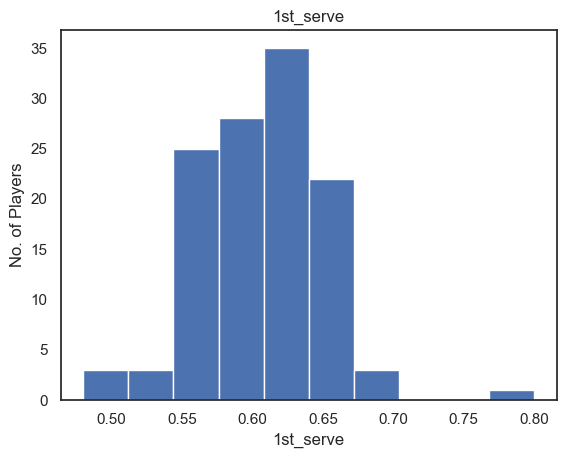

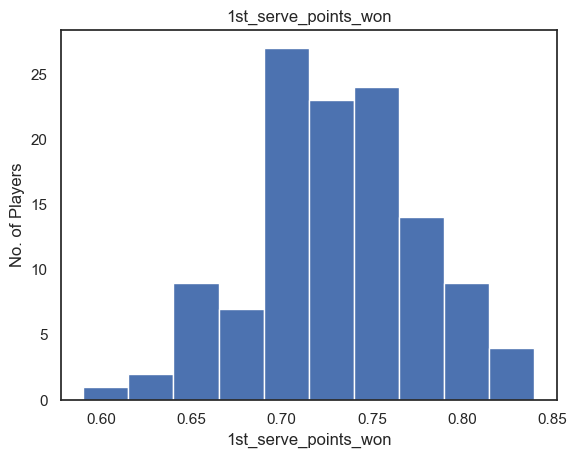

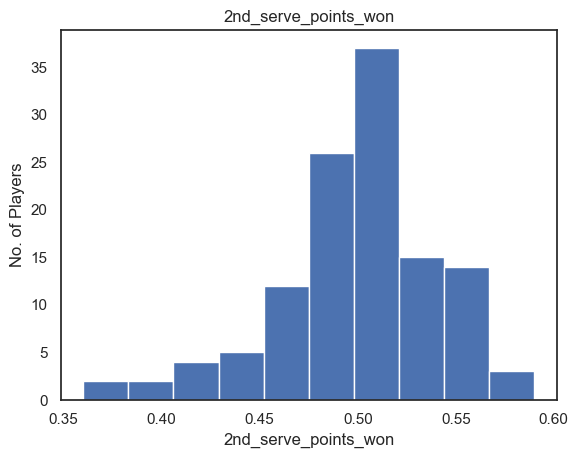

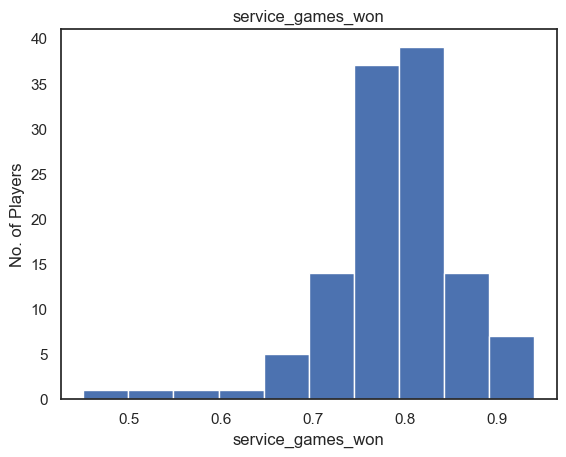

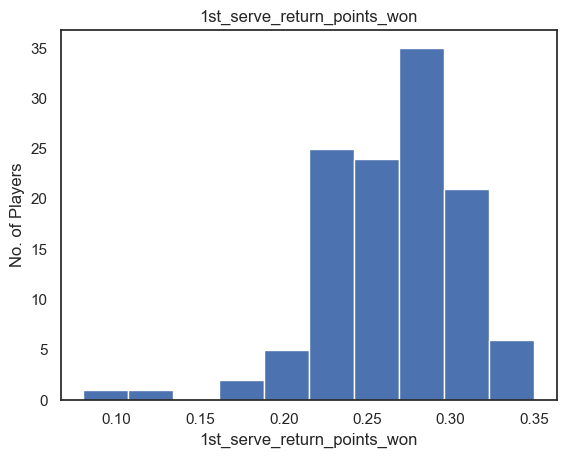

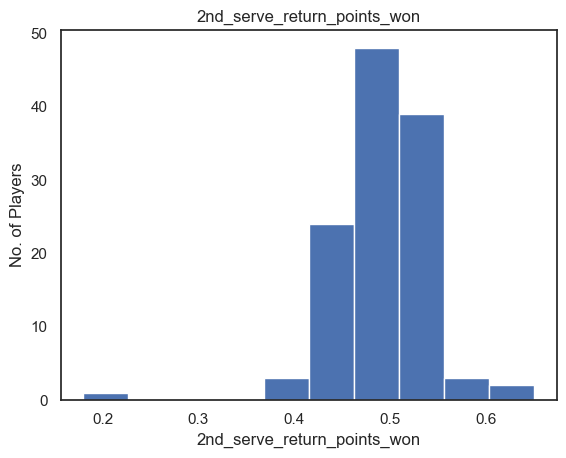

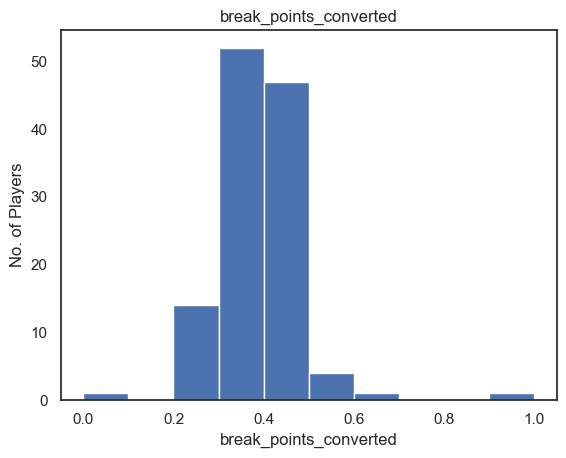

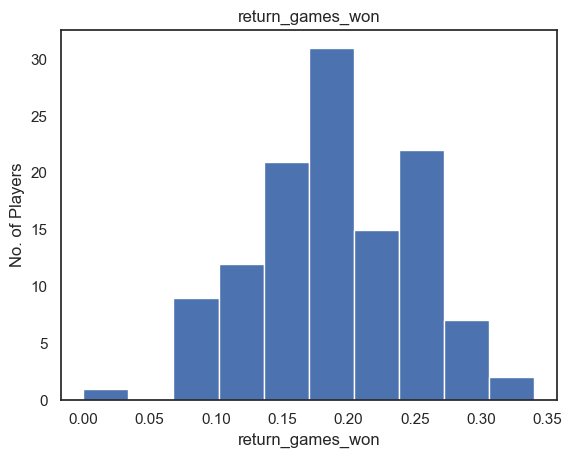

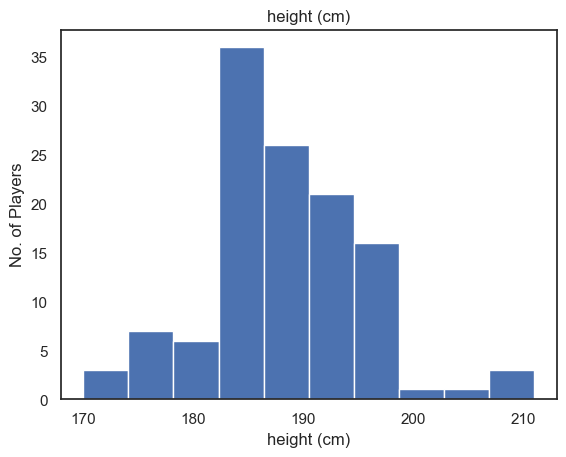

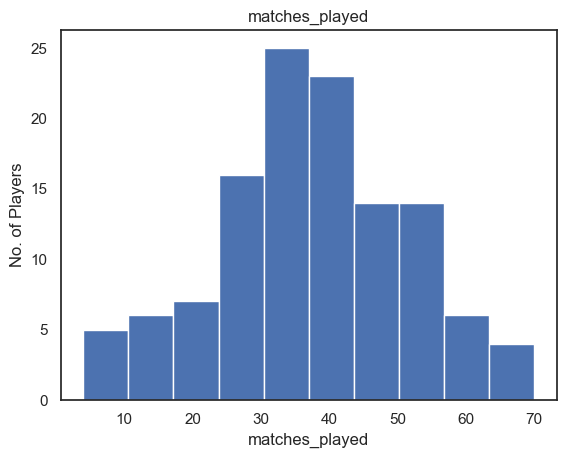

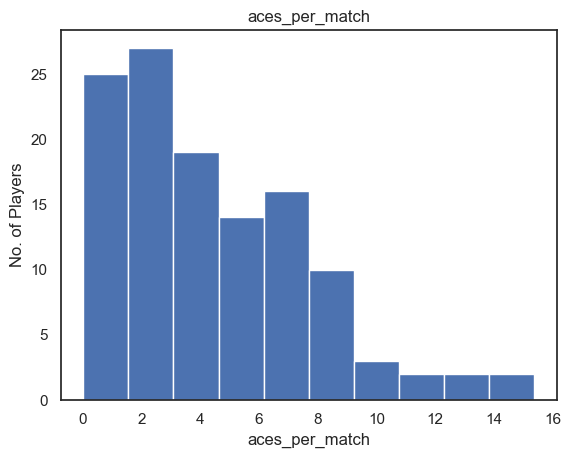

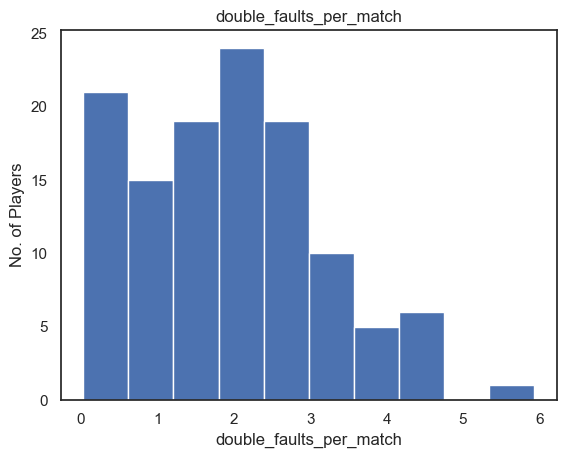

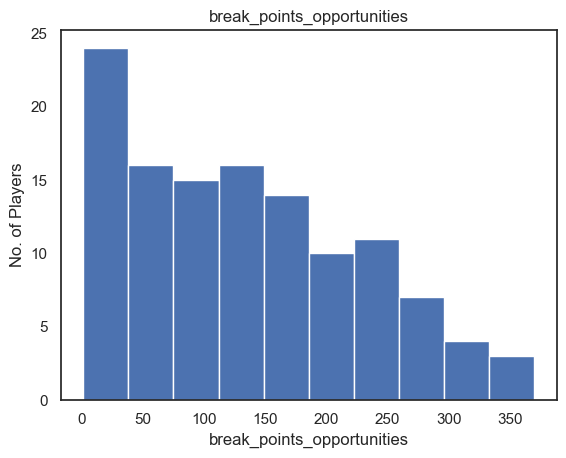

In [168]:
for col in cols:
    plt.hist(data[col], label=col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('No. of Players')
    plt.show()

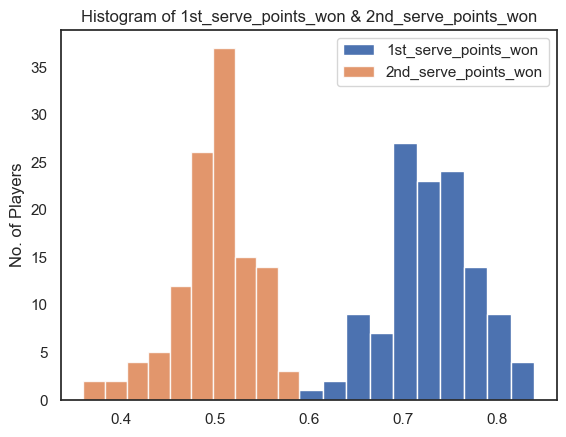

In [169]:
plt.hist(data['1st_serve_points_won'], label='1st_serve_points_won')
plt.hist(data['2nd_serve_points_won'], label='2nd_serve_points_won', alpha=0.85)
plt.title('Histogram of 1st_serve_points_won & 2nd_serve_points_won')
plt.ylabel('No. of Players')
plt.legend(['1st_serve_points_won','2nd_serve_points_won'])
plt.show()

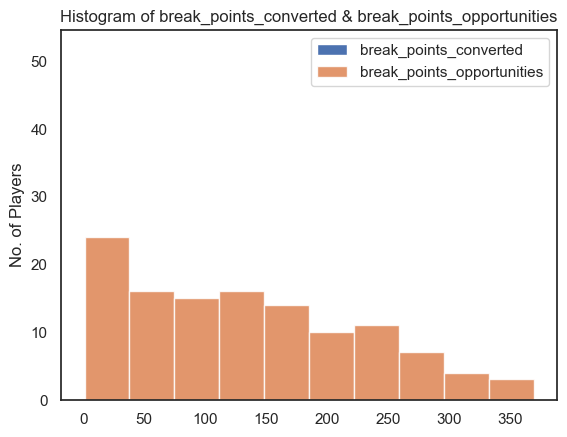

In [170]:
plt.hist(data['break_points_converted'], label='break_points_converted')
plt.hist(data['break_points_opportunities'], label='break_points_opportunities', alpha=0.85)
plt.title('Histogram of break_points_converted & break_points_opportunities')
plt.ylabel('No. of Players')
plt.legend(['break_points_converted','break_points_opportunities'])
plt.show()

In [171]:
data

,Unnamed: 0,name,year,aces,double_faults,1st_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_games_won,return_points_won,total_points_won,rank,height (cm),matches_played,aces_per_match,double_faults_per_match,break_points_opportunities_per_match,break_points_faced_per_match
0,0,Novak Djokovic,2018,174,91,0.64,0.74,0.58,157,0.66,...,0.29,0.41,0.54,1.0,188,42,4.142857,2.166667,8.261905,3.738095
1,1,Mitchell Krueger,2018,17,8,0.58,0.69,0.48,27,0.48,...,0.13,0.35,0.46,231.0,188,44,0.386364,0.181818,0.636364,0.613636
2,2,Rafael Nadal,2018,54,32,0.67,0.71,0.55,129,0.68,...,0.30,0.41,0.53,2.0,185,17,3.176471,1.882353,9.588235,7.588235
3,3,James Duckworth,2018,45,25,0.49,0.78,0.47,35,0.51,...,0.15,0.34,0.48,238.0,183,26,1.730769,0.961538,0.807692,1.346154
4,4,Roger Federer,2018,401,98,0.61,0.79,0.58,173,0.69,...,0.25,0.39,0.54,3.0,185,52,7.711538,1.884615,6.096154,3.326923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,Roberto Carballes Baena,2018,17,24,0.61,0.79,0.49,33,0.67,...,0.16,0.33,0.50,73.0,183,12,1.416667,2.000000,2.416667,2.750000
124,124,Jo-Wilfried Tsonga,2018,138,36,0.61,0.80,0.56,54,0.74,...,0.10,0.30,0.50,177.0,188,12,11.500000,3.000000,5.416667,4.500000
125,125,Martin Klizan,2018,62,26,0.59,0.73,0.53,59,0.56,...,0.20,0.35,0.50,40.0,191,27,2.296296,0.962963,2.037037,2.185185
126,126,Stan Wawrinka,2018,181,63,0.57,0.73,0.56,150,0.65,...,0.16,0.34,0.50,59.0,183,27,6.703704,2.333333,5.666667,5.555556


<Axes: >

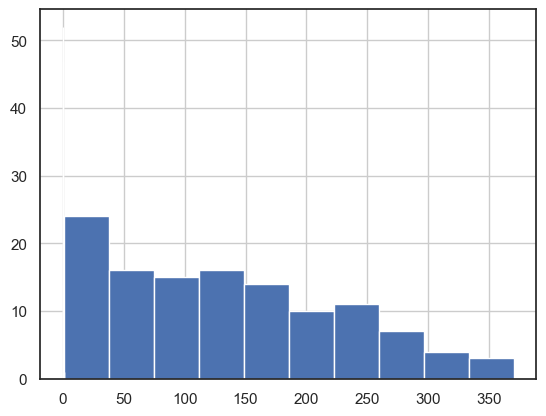

In [172]:
data.break_points_opportunities.hist()
data.break_points_converted.hist()

In [173]:
data['break_points_opportunities_sc'] = (data.break_points_opportunities - data.break_points_opportunities.mean()) / data.break_points_opportunities.std()
data.break_points_converted /= 100
data['break_points_converted_sc'] = (data.break_points_converted - data.break_points_converted.mean()) / data.break_points_converted.std()


In [174]:
data.break_points_converted.mean(), data.break_points_converted.std()

(0.003855, 0.0009740196536591475)

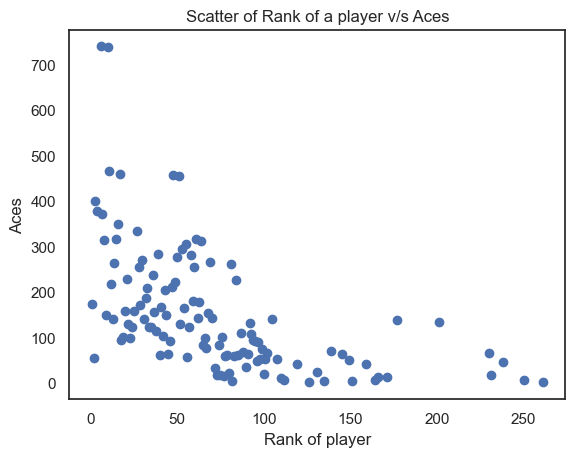

In [182]:
plt.scatter(data['rank'], data.aces)
plt.ylabel('Aces')
plt.xlabel('Rank of player')
plt.title('Scatter of Rank of a player v/s Aces')
plt.show()

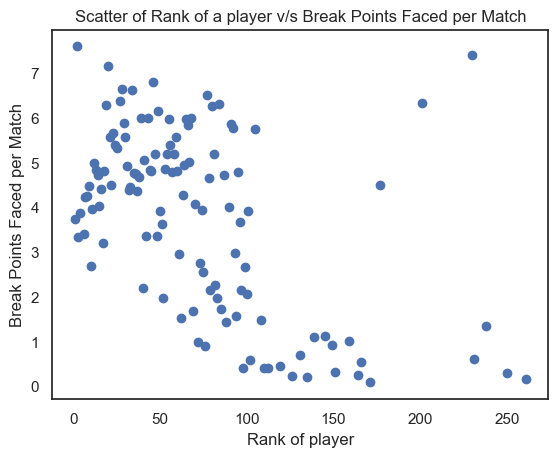

In [186]:
plt.scatter(data['rank'], data.break_points_faced_per_match)
plt.ylabel('Break Points Faced per Match')
plt.xlabel('Rank of player')
plt.title('Scatter of Rank of a player v/s Break Points Faced per Match')
plt.show()

In [187]:
data.columns

Index(['Unnamed: 0', 'name', 'year', 'aces', 'double_faults', '1st_serve',
       '1st_serve_points_won', '2nd_serve_points_won', 'break_points_faced',
       'break_points_saved', 'service_games_played', 'service_games_won',
       'total_service_points_won', '1st_serve_return_points_won',
       '2nd_serve_return_points_won', 'break_points_opportunities',
       'break_points_converted', 'return_games_played', 'return_games_won',
       'return_points_won', 'total_points_won', 'rank', 'height (cm)',
       'matches_played', 'aces_per_match', 'double_faults_per_match',
       'break_points_opportunities_per_match', 'break_points_faced_per_match',
       'break_points_opportunities_sc', 'break_points_converted_sc'],
      dtype='object')

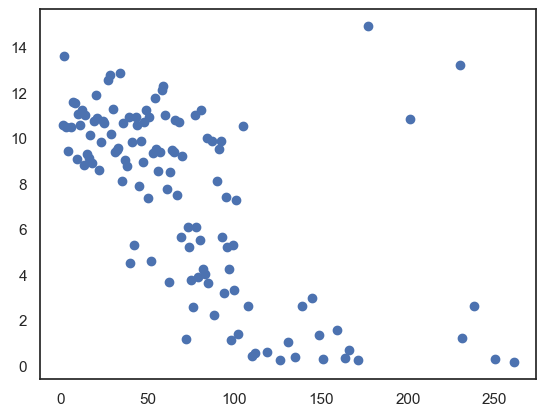

In [194]:
pm = data.return_games_played / data.matches_played
plt.scatter(data['rank'], pm)

In [13]:
data[data['rank'] > 160][['name','aces_per_match', 'rank']]

,name,aces_per_match,rank
1,Mitchell Krueger,0.386364,231.0
3,James Duckworth,1.730769,238.0
15,Kamil Majchrzak,0.000000,176.0
21,Steve Darcis,NaN,315.0
35,Rudolf Molleker,0.000000,207.0
37,Christopher Eubanks,0.216667,171.0
43,Andy Murray,6.500000,230.0
45,Luca Vanni,0.218750,164.0
63,Zhe Li,0.045455,261.0
80,Daniel Evans,0.000000,190.0
